In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### 복습 
1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 데이터프레임의 정보, 결측치가 존재하는가?
3. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '증류주소비량', '와인소비량', '소비알콜량', '대륙']
4. 대륙 컬럼에 결측치가 존재 -> 결측치를 'OT'로 대체
5. 새로운 파생변수(총 술소비량) 생성 -> 맥주소비량 + 증류주소비량 + 와인소비량
5. 새로운 파생변수(도수) 생성 -> 소비알콜량 / 총 술소비량 * 100
6. 도수 컬럼의 전체 평균보다 대륙별 도수 평균이 높은 대륙을 출력

In [ ]:
## csv 파일 로드 
drinks = pd.read_csv("../../csv/drinks.csv")
drinks.head(2)

In [ ]:
## 데이터프레임의 정보(info())를 출력 
drinks.info()

In [ ]:
## 결측치의 개수 
drinks.isna().sum()

In [ ]:
## 결측치가 존재하는 컬럼은 어디인가?
drinks.isna().any(axis=0)

In [ ]:
## 컬럼의 이름을 변경 
## case1 (rename())
drinks.rename(
    columns= {
        'country' : '국가', 
        'beer_servings' : '맥주소비량', 
        'spirit_servings' : '증류주소비량', 
        'wine_servings' : '와인소비량', 
        'total_litres_of_pure_alcohol' : '소비알콜량', 
        'continent' : '대륙'
    }
)

In [ ]:
## case2 ( DataFrame Class 안에 columns 변수의 데이터를 변경 )
drinks.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', 
                  '소비알콜량', '대륙']

In [ ]:
# 대륙 컬럼의 결측치를 'OT' 대체
# fillna('OT')
drinks['대륙'].fillna('OT', inplace=True)

In [ ]:
drinks.isna().sum()

In [ ]:
drinks['대륙'].value_counts()

In [ ]:
## 파생변수 총 술소비량 -> 맥주소비량 + 증류주소비량 + 와인소비량
drinks['총 술소비량'] = \
    drinks['맥주소비량'] + drinks['증류주소비량'] + drinks['와인소비량']

In [ ]:
# 파생변수 도수 -> 소비알콜량 / 총 술소비량 * 100
drinks['도수'] = \
    (drinks['소비알콜량'] / drinks['총 술소비량']) * 100

In [ ]:
# 도수 컬럼의 결측치를 0으로 대체
drinks['도수'].fillna(0, inplace=True)

In [ ]:
# 전체 도수의 평균 출력 
mean_data = drinks['도수'].mean()

In [ ]:
# 대륙별 도수의 평균 출력 
group_data = drinks[ ['대륙', '도수'] ].groupby(['대륙']).mean()

In [ ]:
flag = group_data['도수'] > mean_data
flag

In [ ]:
group_data.loc[flag]

- 총 술소비량을 기준으로 우리나라는 몇위인가?
    1. 총 술소비량을 기준으로 내림차순 정렬
    2. 인덱스를 초기화하고 기존의 인덱스는 제거  
    2. 국가 컬럼의 데이터가 South Korea인 데이터의 인덱스와 총술소비량 데이터를 확인 
    3. 전체 데이터를 기준으로 막대그래프를 생성하고 한국의 막대의 색상을 변경하고 주석을 추가 

In [ ]:
# 복사본 생성
df = drinks.copy()

In [ ]:
# 총 술소비량을 기준으로 내림차순 정렬
df.sort_values(['총 술소비량'], ascending=False, inplace=True)

In [ ]:
# 인덱스를 재지정하고 기존의 인덱스는 제거 
df.reset_index(drop=True, inplace=True)

In [ ]:
# South Korea의 데이터를 확인
flag = df['국가'] == 'South Korea'
df.loc[flag]

In [ ]:
# South Korea의 인덱스와 총 술소비량의 데이터를 변수에 저장
korea_index = df.loc[flag].index[0]
korea_index

In [ ]:
korea_value = df.iloc[korea_index, 6]
korea_value2 = df.loc[korea_index, '총 술소비량']
korea_value2

In [ ]:
# korea_index는 x축 좌표 값 (막대의 위치값)
# korea_value는 y축 좌표 값

# 총 술소비량 데이터를 기준으로 막대그래프 생성
x = df.index
y = df['총 술소비량']

# 그래프의 크기를 변경 
plt.figure(figsize=(20, 8))
# 막대그래프 생성 
bar_list = plt.bar(x, y)
# South Korea의 막대를 선택하여 막대의 색상을 변경
bar_list[korea_index].set_color('r')

# 주석을 추가 
plt.annotate(
    f'South Korea : {korea_index + 1}', 
    xy = (korea_index, korea_value), 
    xytext = (korea_index + 10, korea_value + 100), 
    fontsize = 30,
    arrowprops= {
        'facecolor' : 'r', 
        'edgecolor' : 'k', 
        'headwidth' : 20, 
        'headlength' : 20, 
        'width' : 10, 
        'shrink' : 0.1         ## 화살표가 위치하는 범위  
    }
)
plt.xlim(0, 200)

plt.show()


#### 복습 
- 도수를 기준으로 우리나라가 얼마나 독한 술을 먹고 있는가?
    1. drinks데이터프레임을 복사본 생성 (df2)
    2. df2를 도수를 기준으로 내림차순 정렬 
    3. 기존의 인덱스는 제거하고 인덱스를 재지정
    4. South Korea의 인덱스의 값과 도수의 value를 변수로 저장 
    5. 막대그래프 생성하여 x축은 인덱스값, y축 도수
    6. 한국의 막대의 색상을 red로 변경 
    7. 주석을 생성하여 South Korea : 랭킹, 도수 : value 추가

In [ ]:
df2 = drinks.copy()

In [ ]:
df2.sort_values(['도수'], ascending=False, inplace=True)

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
korea_index = df2.loc[df2['국가'] == 'South Korea'].index[0]
korea_index

In [ ]:
korea_value = df2.loc[korea_index, '도수']
korea_value

In [70]:
import platform

In [72]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

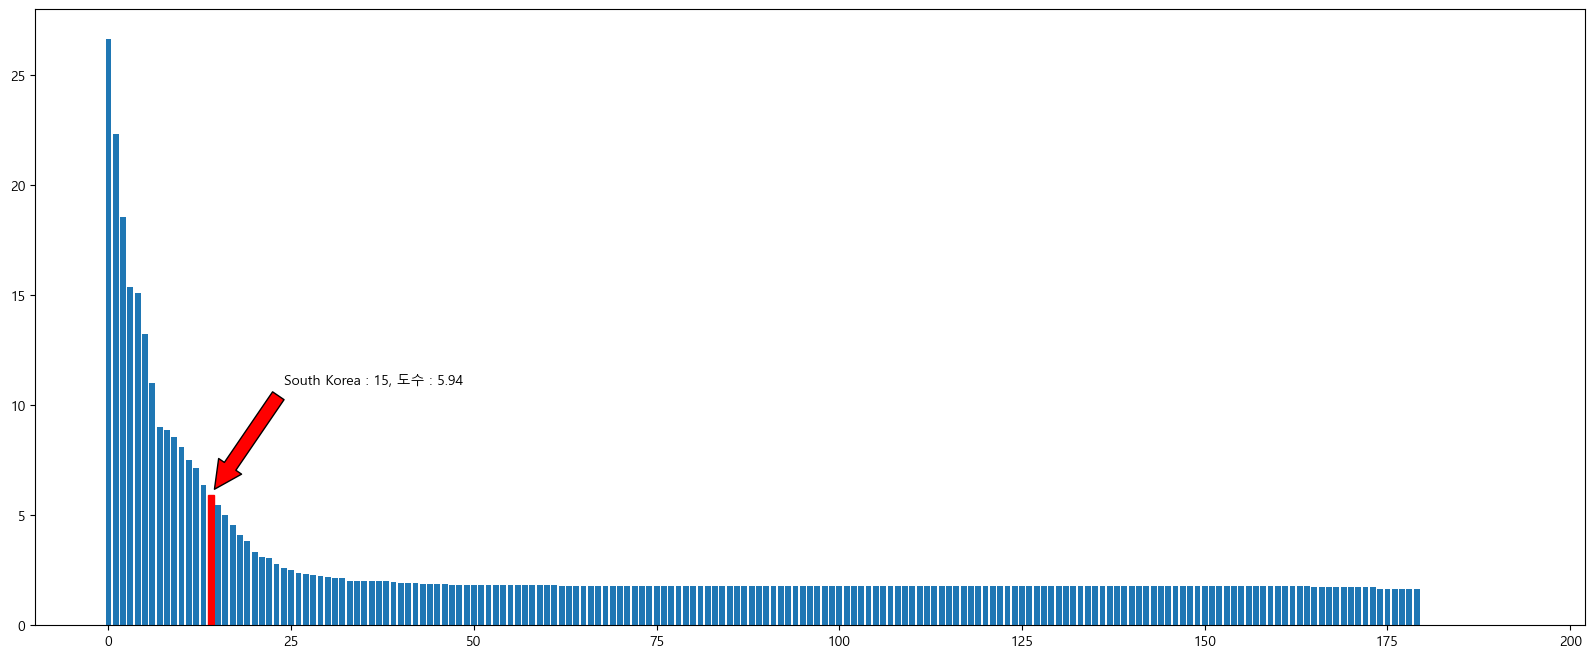

In [73]:
# 그래프를 생성 
x = df2.index
y = df2['도수']

plt.figure(figsize=(20, 8))
bar_list = plt.bar(x, y)
bar_list[korea_index].set_color('r')

plt.annotate(
    f'South Korea : {korea_index + 1}, 도수 : {round(korea_value, 2)}',
    xy = (korea_index, korea_value), 
    xytext = (korea_index + 10, korea_value + 5), 
    arrowprops= {
        'facecolor' : 'r', 
        'edgecolor' : 'k', 
        'headwidth' : 20, 
        'headlength' : 20, 
        'width' : 10, 
        'shrink' : 0.05
    }
)
plt.show()



